# 4.3 Random Walks

##  - 4.3: random walks... show that in 2 dimensions the average distance traveled goes like sqrt(N)... what happens with random sized steps?... try different numbers of dimensions.

In [80]:
import math
import pandas
import matplotlib.pyplot as plt
import random
from vpython import *

<IPython.core.display.Javascript object>

In [9]:
jmax = 20

In [13]:
x=0
y=0

x += (random.random() - 0.5)*2
y += (random.random() - 0.5)*2

In [14]:
x,y

(-0.5703225627512927, 0.041732672539629645)

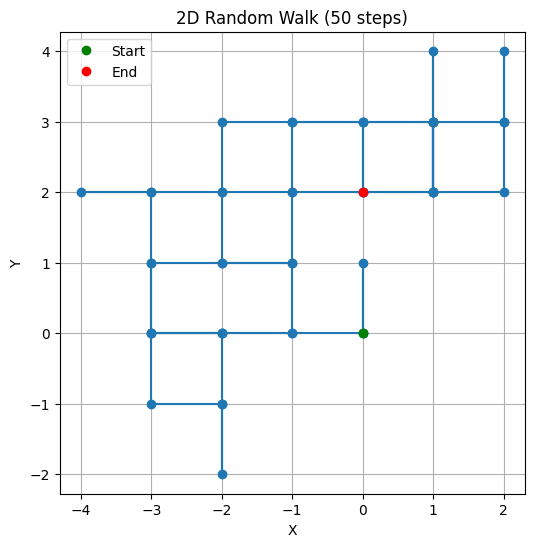

In [1]:
import matplotlib.pyplot as plt
import random

# Start at origin
x, y = 0, 0
x_vals = [x]
y_vals = [y]

# Define 2D directions
directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]  # Right, Left, Up, Down

# Perform 50 steps
for _ in range(50):
    dx, dy = random.choice(directions)
    x += dx
    y += dy
    x_vals.append(x)
    y_vals.append(y)

# Plot the path
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, marker='o', linestyle='-')
plt.plot(0, 0, 'go', label='Start')
plt.plot(x_vals[-1], y_vals[-1], 'ro', label='End')
plt.title("2D Random Walk (50 steps)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.axis("equal")
plt.show()


# 5.14 Monte Carlo Integration by Stone Throwing

## 2-Dimension Estimation of π

In [62]:
c = 0
EPS = 10**-4
n = 0
pi = 0

n_list = []
pi_list = []

while True:
    x = random.random()
    y = random.random()
    d = math.sqrt(x**2 + y**2)
    c+=1 if d < 1 else 0
    n+=1

    n_list.append(n)
    pi_list.append(4*c/(n))
    
    if abs(((4*c/(n))-math.pi))<EPS:
        break

In [63]:
n,c,4*c/(n)

(219, 172, 3.141552511415525)

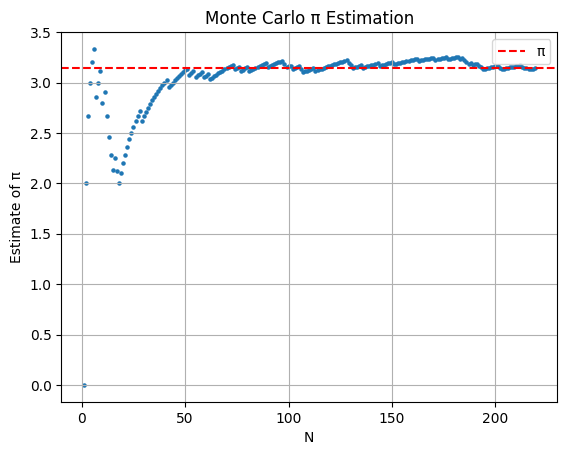

In [77]:
plt.scatter(n_list, pi_list, s=5)
plt.xlabel('N')
plt.ylabel('Estimate of π')
plt.title('Monte Carlo π Estimation')

plt.axhline(y=math.pi, color='red', linestyle='--', label='π')
plt.legend()
plt.grid(True)

## Estimating Volume of N-Dimension Spheres

In [78]:
def sphere_vol(n, R):
    return ( (math.pi ** (n / 2))  /  (math.gamma((n / 2) + 1)) ) * (R ** n)
    
N = 10**6

def mc_vol(n,R):
    s = 0

    for i in range(N):
        point = [random.uniform(-R, R) for j in range(n)]
        d = math.sqrt(sum(x**2 for x in point))
        if d <= R:
            s += 1
    
    vol_cube = (2 * R) ** n
    vol_sphere = (s / N) * vol_cube

    return vol_sphere

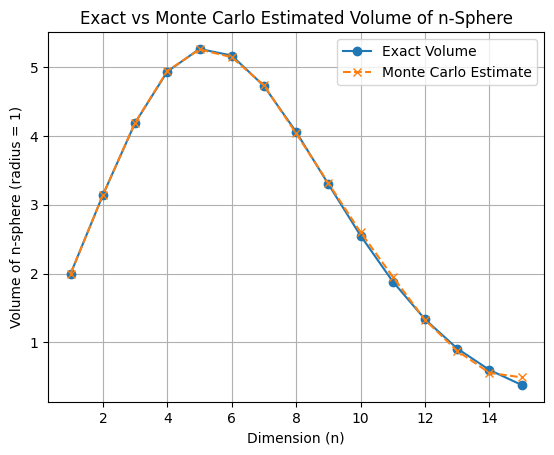

In [79]:
dimensions = list(range(1, 16))
R = 1

known_vols = [sphere_vol(n, R) for n in dimensions]
mc_vols = [mc_vol(n, R) for n in dimensions]

plt.plot(dimensions, known_vols, 'o-', label='Exact Volume')
plt.plot(dimensions, mc_vols, 'x--', label='Monte Carlo Estimate')
plt.xlabel('Dimension (n)')
plt.ylabel('Volume of n-sphere (radius = 1)')
plt.title('Exact vs Monte Carlo Estimated Volume of n-Sphere')
plt.legend()
plt.grid(True)
plt.show()